In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import mysql.connector as cnt

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [3]:
nypd = pd.read_csv('../../DATA/NYPD.csv')     #failo nuskaitymas 
nypd.head(2)                                  #failo patikrinimas 

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,226323781,3/30/2021,23:45:00,QUEENS,100,0.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1036867,153432,40.587664,-73.81056,POINT (-73.81055977899997 40.587663570000075)
1,226323779,3/30/2021,16:20:00,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.90879,POINT (-73.90879049699998 40.68164709200005)


In [4]:
nypd.info()  #patikriname kokius stulpelius turime 
             # object type = tekstas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23865 entries, 0 to 23864
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             23865 non-null  int64  
 1   OCCUR_DATE               23865 non-null  object 
 2   OCCUR_TIME               23865 non-null  object 
 3   BORO                     23865 non-null  object 
 4   PRECINCT                 23865 non-null  int64  
 5   JURISDICTION_CODE        23863 non-null  float64
 6   LOCATION_DESC            10122 non-null  object 
 7   STATISTICAL_MURDER_FLAG  23865 non-null  bool   
 8   PERP_AGE_GROUP           15236 non-null  object 
 9   PERP_SEX                 15270 non-null  object 
 10  PERP_RACE                15270 non-null  object 
 11  VIC_AGE_GROUP            23865 non-null  object 
 12  VIC_SEX                  23865 non-null  object 
 13  VIC_RACE                 23865 non-null  object 
 14  X_COORD_CD            

In [5]:
nypd = pd.read_csv('../../DATA/NYPD.csv', parse_dates=['OCCUR_DATE', 'OCCUR_TIME'])   # parse+dates = pakeiteme laika ir data i operuojama objekta. 
nypd.head(2)                                 

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,226323781,2021-03-30,2024-09-02 23:45:00,QUEENS,100,0.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1036867,153432,40.587664,-73.81056,POINT (-73.81055977899997 40.587663570000075)
1,226323779,2021-03-30,2024-09-02 16:20:00,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.90879,POINT (-73.90879049699998 40.68164709200005)


In [6]:
nypd.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23865 entries, 0 to 23864
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INCIDENT_KEY             23865 non-null  int64         
 1   OCCUR_DATE               23865 non-null  datetime64[ns]
 2   OCCUR_TIME               23865 non-null  datetime64[ns]
 3   BORO                     23865 non-null  object        
 4   PRECINCT                 23865 non-null  int64         
 5   JURISDICTION_CODE        23863 non-null  float64       
 6   LOCATION_DESC            10122 non-null  object        
 7   STATISTICAL_MURDER_FLAG  23865 non-null  bool          
 8   PERP_AGE_GROUP           15236 non-null  object        
 9   PERP_SEX                 15270 non-null  object        
 10  PERP_RACE                15270 non-null  object        
 11  VIC_AGE_GROUP            23865 non-null  object        
 12  VIC_SEX                  23865 n

In [4]:
nypd = pd.read_csv('../../DATA/NYPD.csv', parse_dates={'DATA' : ['OCCUR_DATE', 'OCCUR_TIME']})   # parse+dates = pakeiteme laika ir data i operuojama objekta. 
nypd.head(2)                                           #naudodami zodyna nurodome kad 2 stulpelius apjungtu i viena DATA           

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,2021-03-30 23:45:00,226323781,QUEENS,100,0.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1036867,153432,40.587664,-73.81056,POINT (-73.81055977899997 40.587663570000075)
1,2021-03-30 16:20:00,226323779,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.90879,POINT (-73.90879049699998 40.68164709200005)


In [5]:
# pandas grupavimas 
#groupby ir get_group, group.keys()

nypd_boro = nypd.groupby('BORO')
print(nypd_boro)

In [6]:
nypd_boro.groups.keys()   #gauname sarasa per kuri galime prasukti cikla 

dict_keys(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'])

In [8]:
nypd_boro.get_group('BRONX')  #grazina lentel kur irasai su 'BRONX'
nypd_boro.get_group()

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
2,2021-03-30 23:15:00,226323782,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1012074,240410,40.826510,-73.899465,POINT (-73.89946470899997 40.82650984800006)
4,2021-03-30 22:23:00,226320600,BRONX,45,0.0,NaN,True,NaN,NaN,NaN,18-24,M,BLACK HISPANIC,1032091,241976,40.830722,-73.827126,POINT (-73.82712605899997 40.83072232800004)
5,2021-03-30 02:25:00,226321041,BRONX,44,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,1004227,237572,40.818742,-73.927827,POINT (-73.92782678799993 40.818741576000036)
11,2021-03-28 15:15:00,226230155,BRONX,52,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK HISPANIC,1008778,253049,40.861210,-73.911328,POINT (-73.91132794299993 40.86120995700002)
13,2021-03-28 21:15:00,226230156,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1009909,241902,40.830612,-73.907282,POINT (-73.90728181399999 40.83061151500005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,2006-01-05 19:12:00,10038632,BRONX,41,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1011607,236142,40.814797,-73.901170,POINT (-73.90116952199998 40.81479685700003)
23844,2006-01-05 15:06:00,10038631,BRONX,52,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1012694,254136,40.864182,-73.897166,POINT (-73.89716623799995 40.864181694000074)
23848,2006-01-04 19:17:00,10038630,BRONX,42,0.0,FAST FOOD,False,UNKNOWN,M,BLACK,25-44,M,BLACK,1010158,242491,40.832227,-73.906380,POINT (-73.90637976999993 40.832227424000045)
23862,2006-01-01 05:51:00,9953246,BRONX,44,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [12]:
nb_flag =nypd_boro = nypd.groupby(['BORO', 'STATISTICAL_MURDER_FLAG'])
nb_flag.groups.keys()     #parodo kokias grupes padare 


dict_keys([('BRONX', False), ('BRONX', True), ('BROOKLYN', False), ('BROOKLYN', True), ('MANHATTAN', False), ('MANHATTAN', True), ('QUEENS', False), ('QUEENS', True), ('STATEN ISLAND', False), ('STATEN ISLAND', True)])

In [18]:
nb_flag.get_group(('BRONX', False))   #kodas istraukia nurodyta viena grupe is lenteles 

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
2,2021-03-30 23:15:00,226323782,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1012074,240410,40.826510,-73.899465,POINT (-73.89946470899997 40.82650984800006)
5,2021-03-30 02:25:00,226321041,BRONX,44,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,1004227,237572,40.818742,-73.927827,POINT (-73.92782678799993 40.818741576000036)
11,2021-03-28 15:15:00,226230155,BRONX,52,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK HISPANIC,1008778,253049,40.861210,-73.911328,POINT (-73.91132794299993 40.86120995700002)
13,2021-03-28 21:15:00,226230156,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1009909,241902,40.830612,-73.907282,POINT (-73.90728181399999 40.83061151500005)
16,2021-03-27 02:23:00,226203718,BRONX,52,0.0,NaN,False,NaN,NaN,NaN,25-44,F,WHITE HISPANIC,1018052,257046,40.872150,-73.877781,POINT (-73.87778049799994 40.87214986200007)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,2006-01-05 19:12:00,10038632,BRONX,41,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1011607,236142,40.814797,-73.901170,POINT (-73.90116952199998 40.81479685700003)
23844,2006-01-05 15:06:00,10038631,BRONX,52,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1012694,254136,40.864182,-73.897166,POINT (-73.89716623799995 40.864181694000074)
23848,2006-01-04 19:17:00,10038630,BRONX,42,0.0,FAST FOOD,False,UNKNOWN,M,BLACK,25-44,M,BLACK,1010158,242491,40.832227,-73.906380,POINT (-73.90637976999993 40.832227424000045)
23862,2006-01-01 05:51:00,9953246,BRONX,44,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [19]:
nypd.head(3)

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,2021-03-30 23:45:00,226323781,QUEENS,100,0.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1036867,153432,40.587664,-73.810560,POINT (-73.81055977899997 40.587663570000075)
1,2021-03-30 16:20:00,226323779,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.908790,POINT (-73.90879049699998 40.68164709200005)
2,2021-03-30 23:15:00,226323782,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1012074,240410,40.826510,-73.899465,POINT (-73.89946470899997 40.82650984800006)


In [20]:
nypd['V'] = nypd['DATA'].dt.hour  #pridedame nauja stulpeli #nurodome kokia reiksme turi naujas stulpelis 
nypd.head(5)

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,V
0,2021-03-30 23:45:00,226323781,QUEENS,100,0.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1036867,153432,40.587664,-73.810560,POINT (-73.81055977899997 40.587663570000075),23
1,2021-03-30 16:20:00,226323779,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.908790,POINT (-73.90879049699998 40.68164709200005),16
2,2021-03-30 23:15:00,226323782,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1012074,240410,40.826510,-73.899465,POINT (-73.89946470899997 40.82650984800006),23
3,2021-03-30 13:35:00,226321042,MANHATTAN,7,0.0,NaN,False,18-24,M,BLACK,18-24,M,BLACK,987721,202253,40.721822,-73.987479,POINT (-73.98747935099993 40.72182201900005),13
4,2021-03-30 22:23:00,226320600,BRONX,45,0.0,NaN,True,NaN,NaN,NaN,18-24,M,BLACK HISPANIC,1032091,241976,40.830722,-73.827126,POINT (-73.82712605899997 40.83072232800004),22


In [22]:
nypdII = nypd[['DATA', 'V', 'BORO', 'STATISTICAL_MURDER_FLAG']]  #nurodome kuriuos stulpelius paimame is originalios lenteles
nypdII.head(3)

,DATA,V,BORO,STATISTICAL_MURDER_FLAG
0,2021-03-30 23:45:00,23,QUEENS,False
1,2021-03-30 16:20:00,16,BROOKLYN,False
2,2021-03-30 23:15:00,23,BRONX,False


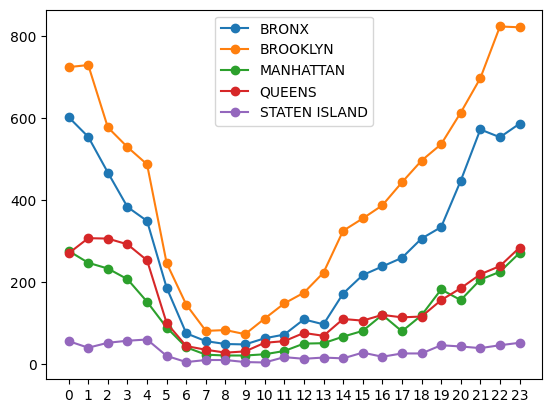

In [27]:
nypd_boro = nypdII.groupby('BORO')                         # Grupuojame duomenis pagal 'BORO' stulpelį
boros = nypd_boro.groups.keys()                            # Gauname visų grupių raktus iš grupavimo

fig, axis = plt.subplots()                                 # Sukuriame figūrą ir ašis piešimui naudojant matplotlib

for boro in boros:                                         # Iteruojame per kiekvieną BORO grupę ir piešiame grafiką
    b = nypd_boro.get_group(boro)                          # Gauname duomenų grupę pagal konkretų boro
    h = b['V'].value_counts().sort_index(ascending=True)   # Skaičiuojame ir rūšiuojame reikšmių pasikartojimą stulpelyje 'V'
    
    axis.plot(h.index, h.values, label=boro, marker='o')   # Braižome linijinį grafiką su taškais kiekvienai boro grupės reikšmių seka

axis.set_xticks(h.index)                                   # Nustatome x ašies žymes pagal paskutinio boro indeksus
axis.legend(loc='best')                                    # Rodyti legendą geriausioje vietoje
plt.show()                                                 # Atvaizduoti grafiką


In [30]:
# Atvaizduokite grafiką, kuriame būtų tik mirtinų susiškaudymų kiekiai per valandą kiekviename rajone. 
# Panaudokite plot() grafiką. Su pie plot atvaizduokite, kiek mirtinų nusišaudymų tenka kiekvienam rajonui.

b = nypd[['DATA', 'V', 'BORO', 'STATISTICAL_MURDER_FLAG']]  #nurodome kuriuos stulpelius paimame is originalios lenteles
b.head()

,DATA,V,BORO,STATISTICAL_MURDER_FLAG
0,2021-03-30 23:45:00,23,QUEENS,False
1,2021-03-30 16:20:00,16,BROOKLYN,False
2,2021-03-30 23:15:00,23,BRONX,False
3,2021-03-30 13:35:00,13,MANHATTAN,False
4,2021-03-30 22:23:00,22,BRONX,True


In [34]:
True_nypd = b[b['STATISTICAL_MURDER_FLAG'] == True]
True_nypd.head()

,DATA,V,BORO,STATISTICAL_MURDER_FLAG
4,2021-03-30 22:23:00,22,BRONX,True
8,2021-03-29 23:13:00,23,MANHATTAN,True
15,2021-03-27 03:49:00,3,BROOKLYN,True
18,2021-03-27 13:00:00,13,BROOKLYN,True
24,2021-03-26 18:40:00,18,BROOKLYN,True


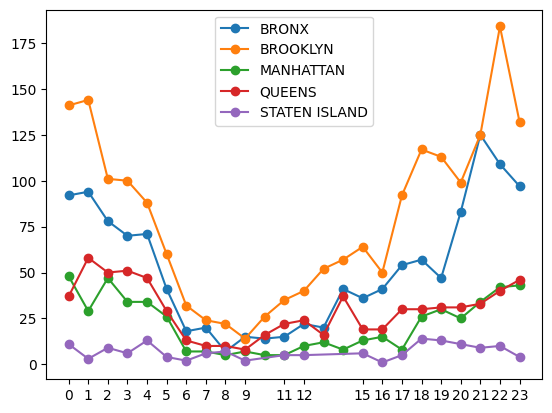

In [39]:
nypd_true = True_nypd.groupby('BORO')  
boros_true = nypd_true.groups.keys()    

fig, axis = plt.subplots() 


for boro in boros_true:                                         # Iteruojame per kiekvieną BORO grupę ir piešiame grafiką
    b = nypd_true.get_group(boro)                          # Gauname duomenų grupę pagal konkretų boro
    h = b['V'].value_counts().sort_index(ascending=True)   # Skaičiuojame ir rūšiuojame reikšmių pasikartojimą stulpelyje 'V'
    
    axis.plot(h.index, h.values, label=boro, marker='o')   # Braižome linijinį grafiką su taškais k
    
    
axis.set_xticks(h.index)                                   # Nustatome x ašies žymes pagal paskutinio boro indeksus
axis.legend(loc='best')                                    # Rodyti legendą geriausioje vietoje
plt.show()                                                 # Atvaizduoti grafiką

In [55]:
True_nypd = b[b['STATISTICAL_MURDER_FLAG'] == True]
True_nypd.head()

,DATA,V,BORO,STATISTICAL_MURDER_FLAG
4,2021-03-30 22:23:00,22,BRONX,True
8,2021-03-29 23:13:00,23,MANHATTAN,True
15,2021-03-27 03:49:00,3,BROOKLYN,True
18,2021-03-27 13:00:00,13,BROOKLYN,True
24,2021-03-26 18:40:00,18,BROOKLYN,True


In [53]:
print(boros_true)

dict_keys(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'])


In [70]:
print(nypd_true)

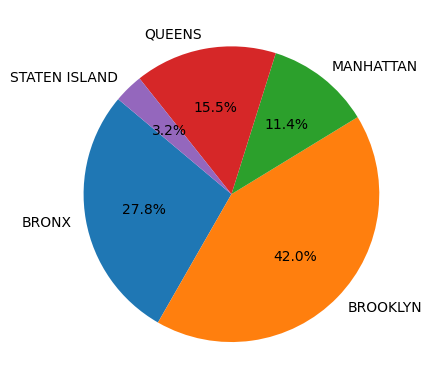

In [79]:
nypd_true = True_nypd.groupby('BORO')

duomenys = {}

for boro, group in nypd_true:
    duomenys[boro] = len(group)

fig, axis = plt.subplots()

axis.pie(duomenys.values(), labels=duomenys.keys(), autopct='%1.1f%%', startangle=140)

plt.show()


In [71]:
print(duomenys)

{'BRONX': 1267, 'BROOKLYN': 1912, 'MANHATTAN': 520, 'QUEENS': 707, 'STATEN ISLAND': 146}


In [76]:
a = nypd_true.get_group('MANHATTAN')
b = len(a)
print(b)

520


In [72]:
print(nypd_true.get_group('MANHATTAN'))


                     DATA   V       BORO  STATISTICAL_MURDER_FLAG
8     2021-03-29 23:13:00  23  MANHATTAN                     True
53    2021-03-15 22:12:00  22  MANHATTAN                     True
79    2021-03-11 21:45:00  21  MANHATTAN                     True
214   2021-01-26 09:03:00   9  MANHATTAN                     True
234   2021-01-18 20:39:00  20  MANHATTAN                     True
...                   ...  ..        ...                      ...
23725 2006-02-03 05:48:00   5  MANHATTAN                     True
23774 2006-01-21 21:49:00  21  MANHATTAN                     True
23777 2006-01-19 20:23:00  20  MANHATTAN                     True
23779 2006-01-19 20:23:00  20  MANHATTAN                     True
23860 2006-01-01 02:22:00   2  MANHATTAN                     True

[520 rows x 4 columns]


In [ ]:
dataframe['Stulpelis'].mean()   #apskaiciuoja stulpelio vidurki 

In [80]:
# Atrinkite 2018 metais vyrus, moteris, uždirbusius daugiau nei bendras vidutinis atlyginimas, 
# surūšiuokite pagal amžiaus grupes ir atvaizduokite procentinį pasiskirstymą su pie plot. 
# Vyrus, moteris atskiruose pie plotuose.


a = pd.read_csv('../../DATA/DUS2018.csv')       
a.head(2)    




,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,sutartis,apmoketos_val,bdu_val,nuts,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas
0,25.57,0,100,XC,0,1_49,40-49,20,A,0,...,N,183,2.51,LT,0,146,460,0,1,G2
1,25.05,13,100,XC,0,1_49,50-59,26,A,0,...,N,183,8.13,LT,0,132,1487,0,2,G2


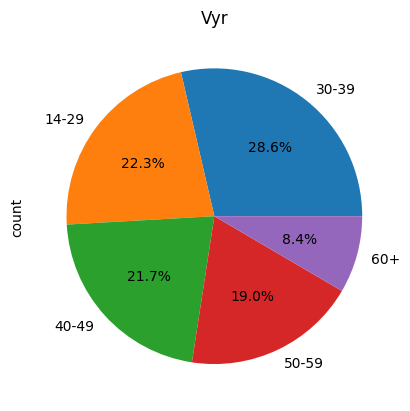

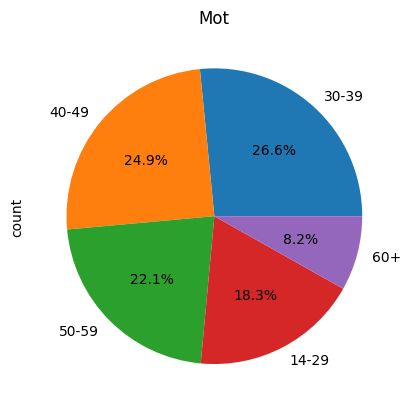

In [122]:
b = a[['amzius', 'lytis', 'bdu_spalio']]  #nurodome kuriuos stulpelius paimame is originalios lenteles
b.head(10)

moterys = b[b['lytis']=='F']    #stulpelis moteru 
vyrai = b[b['lytis']=='M']      #stulpelis vyru 

mot_vidurkis = moterys['bdu_spalio'].mean()     
vyr_vidurkis = vyrai['bdu_spalio'].mean()
bendras_vidurkis = a['bdu_spalio'].mean()

mot_virs = moterys[moterys['bdu_spalio'] > bendras_vidurkis]
vyr_virs = vyrai[vyrai['bdu_spalio'] > bendras_vidurkis]

mot_virs2 = mot_virs['amzius'].value_counts()
vyr_virs2 = vyr_virs['amzius'].value_counts()

# mot_virs2.head(5)
# vyr_virs2.head(5)


vyr_virs2.plot(kind='pie', autopct='%1.1f%%')
plt.title('Vyr')
plt.show()

mot_virs2.plot(kind='pie', autopct='%1.1f%%')
plt.title('Mot')
plt.show()



43164
6589
9783
[36575, 6589]
[33381, 9783]
15.265035677879714


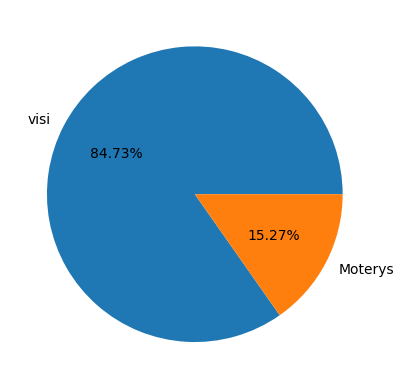

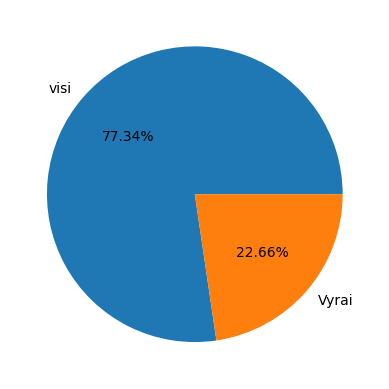

In [156]:
# 1) parodykite, kiek % moterų, vyrų nuo visos imties uždirba daugiau, nei vidurkis

moterys_viso = len(moterys)
vyrai_viso = len(vyrai)
viso = moterys_viso + vyrai_viso
print(viso)

tik_moterys = len(moterys[moterys['bdu_spalio'] > bendras_vidurkis])
tik_vyrai = len(vyrai[vyrai['bdu_spalio'] > bendras_vidurkis])

grafikasM = [viso-tik_moterys, tik_moterys]
grafikasV = [viso-tik_vyrai, tik_vyrai]


print(tik_moterys)
print(tik_vyrai)
print(grafikasM)
print(grafikasV)

a = (6589*100)/43164
print(a)

plt.pie(grafikasM, labels = ['visi', 'Moterys'], autopct='%.2f%%')
plt.show()

plt.pie(grafikasV, labels = ['visi', 'Vyrai'], autopct='%.2f%%')
plt.show()



In [ ]:
# 2) atsižvelkite į amžiaus grupes, irgi lyginame su visa imtimi kiekvieną amžiaus grupę